In [13]:
import cv2
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

from datetime import datetime

from skimage.morphology import skeletonize
from skimage.morphology import thin
from skimage import data
from skimage.util import invert
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.transform import resize

In [14]:
def get_hog_features(in_img):

    MAX_ROW_SIZE = 100
    
    # first resize the image
    if in_img.shape[0] > MAX_ROW_SIZE:
        resized_img = resize(
            in_img, 
            (
                MAX_ROW_SIZE, 
                int( ((1.0*MAX_ROW_SIZE)/in_img.shape[0]) * in_img.shape[1] )  
            )
        )
    else:
        resized_img = in_img
        
    fd, hog_image = hog(
        resized_img, 
        orientations=9, 
        pixels_per_cell=(2, 2),
        cells_per_block=(2, 2), 
        visualize=True
    )
    
    return hog_image


def flatten_hog_version(frames):
    return [get_hog_features(f).flatten() for f in frames]


def flatten_objSeg_version(frames):
    return [get_hog_features(f).flatten() for f in frames]

In [15]:
def to_df_hog_only(
    df,
    save_path
):
    df = df.copy()
    
    i = 0
    prev_progress = 0
    size = len(df)
    
    res = []
    for index, row in df.iterrows():
        
        hog = get_hog_features(row["image"])
        res.append(hog)

        i += 1
        cur_progress = int((i+1)*100/size)
        if cur_progress >= prev_progress + 2:
            print(f"progress: {cur_progress}%")
            print(f"processing {index} at {datetime.now()}")
            prev_progress = cur_progress
            
    df["image"] = res
    df.to_pickle(save_path)

    return df

In [16]:
from nebula.common import write_pickle, read_pickle, display

In [17]:
image_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_medium_df.pkl'
hog_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_medium_df_hog.pkl'

In [18]:
df = read_pickle(image_pickle_path)

In [19]:
hog1 = get_hog_features(df["image"].iloc[0])

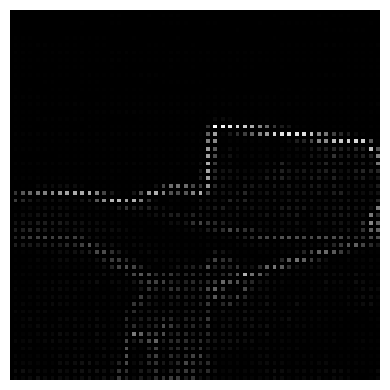

In [20]:
display(hog1)

In [21]:
hog_df = to_df_hog_only(df, hog_pickle_path)

progress: 2%
processing 398 at 2023-04-11 16:37:33.264144
progress: 4%
processing 798 at 2023-04-11 16:42:20.406017
progress: 6%
processing 1198 at 2023-04-11 16:47:44.726926
progress: 8%
processing 1598 at 2023-04-11 16:52:56.454415
progress: 10%
processing 1998 at 2023-04-11 16:58:07.585513
progress: 12%
processing 2398 at 2023-04-11 17:03:09.354558
progress: 14%
processing 2798 at 2023-04-11 17:07:29.072523
progress: 16%
processing 3198 at 2023-04-11 17:11:55.917324
progress: 18%
processing 3598 at 2023-04-11 17:16:45.144103
progress: 20%
processing 3998 at 2023-04-11 17:21:41.682538
progress: 22%
processing 4398 at 2023-04-11 17:26:08.277421
progress: 24%
processing 4798 at 2023-04-11 17:30:33.316189
progress: 26%
processing 5198 at 2023-04-11 17:34:38.543463
progress: 28%
processing 5598 at 2023-04-11 17:38:55.643027
progress: 30%
processing 5998 at 2023-04-11 17:42:54.745485
progress: 32%
processing 6398 at 2023-04-11 17:46:55.567832
progress: 34%
processing 6798 at 2023-04-11 17